In [1]:
import time
import sys
from io import StringIO
import pandas as pd
import pickle
import os
import math
import random
import shutil
import pathlib
import seaborn as sns
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot
from imblearn.over_sampling import ADASYN
from collections import (Counter, defaultdict)
import tensorflow as tf
from scipy import stats
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import keras.callbacks as kcallbacks
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (QuantileTransformer, LabelEncoder)
from sklearn.metrics import (det_curve, balanced_accuracy_score, cohen_kappa_score, hinge_loss, matthews_corrcoef, 
                             top_k_accuracy_score, hamming_loss, jaccard_score, log_loss, zero_one_loss, classification_report,
                             accuracy_score, precision_score, roc_auc_score, average_precision_score, recall_score, f1_score, 
                             mean_squared_error, mean_absolute_error, confusion_matrix, r2_score)

In [2]:
df = pd.read_csv('Feature_14.csv')

In [3]:
dx = [
    'BenignTraffic', 'DDoS-ICMP_Flood', 'Mirai-greeth_flood', 'Mirai-udpplain', 'DDoS-UDP_Flood',
    'Mirai-greip_flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood',
    'DDoS-SynonymousIP_Flood', 'DoS-UDP_Flood', 'DDoS-ICMP_Fragmentation', 'DoS-TCP_Flood',
    'MITM-ArpSpoofing', 'DoS-SYN_Flood', 'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation',
    'DNS_Spoofing', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'DoS-HTTP_Flood',
    'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce',
    'SqlInjection', 'CommandInjection', 'Recon-PingSweep', 'Uploading_Attack', 'Backdoor_Malware',
    'BrowserHijacking', 'XSS'
]

In [4]:
for idx, label in enumerate(dx):
    globals()[f"df{idx}"] = df[df['label'] == label].drop('label', axis=1)

In [5]:
for idx, df in enumerate(dfs):
    p = f"Pxl/{idx}/"
    os.makedirs(p, exist_ok=True)
    c, ims = 0, []
    for i, r in df.iterrows():
        ims.append(r.values)
        c += 1
        if c == 39:
            a = np.array(ims).reshape(13, 13, 3).astype(np.uint8)
            Image.fromarray(a).save(f"{p}{i}.png")
            c, ims = 0, []

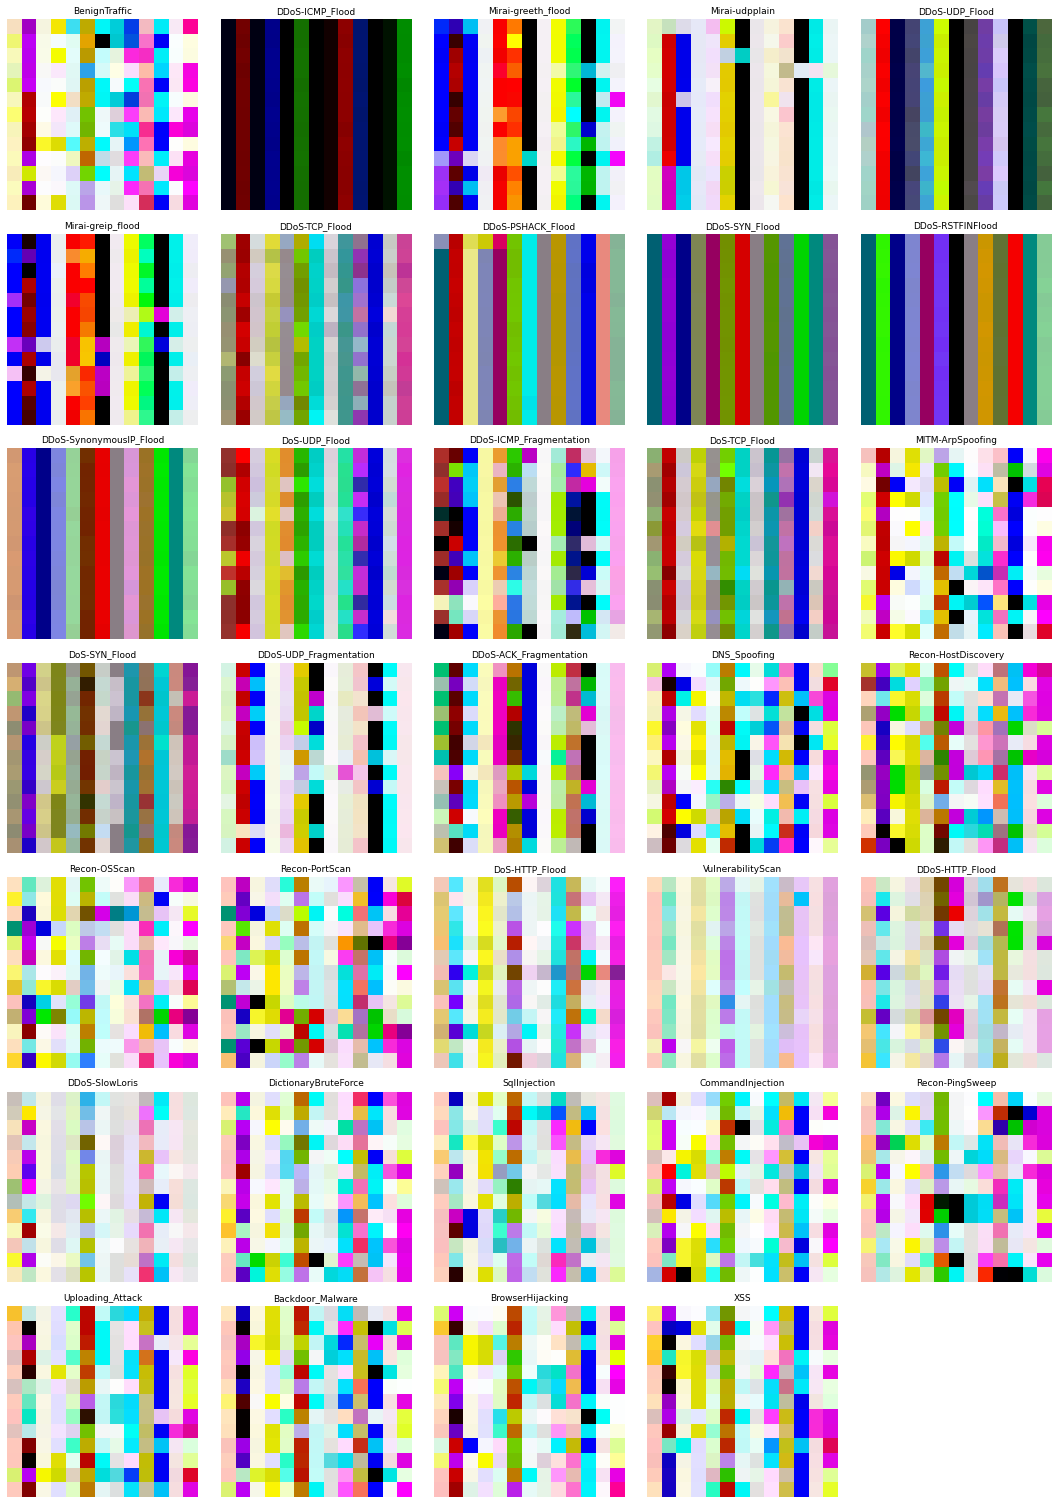

In [7]:
num_images = len(dx)
images = []

for i in range(num_images):
    folder = str(i)
    path = os.path.join('Pxl', folder, '6139244.png')
    img = Image.open(path)
    images.append(img)
cols = 5
rows = (num_images + cols - 1) // cols
plt.figure(figsize=(15, 3 * rows))

for i, (img, title) in enumerate(zip(images, dx)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(title, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()